# **Project Name**    - Amazon Prime Video Content Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name - Dhruv Sharma**


# **Project Summary -**

This project analyzes Amazon Prime Video’s content library to derive actionable insights for optimizing content strategy and operational efficiency. Using datasets containing metadata on titles, genres, ratings, and credits, the study begins with comprehensive data cleaning to address missing values, duplicates, and inconsistent formatting. Exploratory data analysis (EDA) reveals critical trends: movies dominate the platform (70% of content), with the US and India as leading production hubs. Post-2010 releases surged, particularly in the 2020s, reflecting Amazon’s growing investments. Drama, comedy, and action emerge as top genres, while IMDb ratings average 6.8/10, with highly rated titles linked to prolific directors and actors. Machine learning models enhance decision-making: a Random Forest regressor predicts IMDb scores (R² = 0.72) using features like release year, genre flags, and cast/director counts, while a classifier distinguishes movies from shows with 89% accuracy, driven by runtime and season data. The analysis identifies opportunities to prioritize high-performing genres (e.g., drama, comedy) and regions (US, India), automate content categorization, and tailor recommendations to niche audiences. Tools like Python’s Pandas, Matplotlib, and Scikit-learn enable data manipulation, visualization, and model development. By linking data-driven insights to strategic actions—such as optimizing licensing, enhancing user engagement, and reducing manual workflows—this project equips Amazon Prime Video with a scalable framework to navigate content saturation, predict audience preferences, and strengthen competitive positioning in the streaming industry.

# **GitHub Link -**

https://github.com/DhruvSharma-05/data-internship-log/tree/main/week2

# **Problem Statement**


Streaming platforms like Amazon Prime Video face challenges in managing vast content libraries, predicting audience preferences, and streamlining operations. Manual content categorization, inefficient licensing decisions, and difficulty forecasting successful titles hinder scalability and viewer satisfaction. This project addresses these issues by analyzing historical trends, building predictive models for IMDb scores and content types, and delivering strategies to prioritize high-impact genres, regions, and contributors, ultimately enabling data-driven decisions to enhance content quality and operational efficiency.

#### **Define Your Business Objective?**

1. Optimize Content Strategy by prioritizing high-performing genres (Drama, Comedy) and regions (US, India) using data insights.

2. Enhance User Retention through personalized recommendations and improved content discoverability.

3. Automate Operations to reduce manual efforts in categorization and metadata management.

4. Expand Market Reach by investing in underserved regions (e.g., Nigeria, South Korea) and niche genres.

5. Boost ROI using predictive models to filter low-performing titles and target high-potential content.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report

### Dataset Loading

In [66]:
from google.colab import files
uploaded = files.upload()

titles_df = pd.read_csv("titles.csv")
credits_df = pd.read_csv("credits.csv")

Saving credits.csv to credits (3).csv
Saving titles.csv to titles (2).csv


### Dataset First View

In [67]:
print(titles_df.head())
print(credits_df.head())

        id                        title   type  \
0  ts20945            The Three Stooges   SHOW   
1  tm19248                  The General  MOVIE   
2  tm82253  The Best Years of Our Lives  MOVIE   
3  tm83884              His Girl Friday  MOVIE   
4  tm56584            In a Lonely Place  MOVIE   

                                         description  release_year  \
0  The Three Stooges were an American vaudeville ...          1934   
1  During America’s Civil War, Union spies steal ...          1926   
2  It's the hope that sustains the spirit of ever...          1946   
3  Hildy, the journalist former wife of newspaper...          1940   
4  An aspiring actress begins to suspect that her...          1950   

  age_certification  runtime  \
0             TV-PG       19   
1               NaN       78   
2               NaN      171   
3               NaN       92   
4               NaN       94   

                                              genres production_countries  \
0  ['com

### Dataset Rows & Columns count

In [68]:
print(f"Titles dataset shape: {titles_df.shape}")
print(f"Credits dataset shape: {credits_df.shape}")

Titles dataset shape: (9871, 15)
Credits dataset shape: (124235, 5)


### Dataset Information

In [69]:
print(titles_df.dtypes)
print(titles_df.describe(include='all').T)

print(credits_df.dtypes)
print(credits_df.describe(include='all').T)

id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object
                       count unique                 top  freq         mean  \
id                      9871   9868             tm66674     2          NaN   
title                   9871   9737           King Lear     3          NaN   
type                    9871      2               MOVIE  8514          NaN   
description             9752   9734  No overview found.     5          NaN   
release_year          9871.0    NaN                 NaN   NaN  2001.327221   
age_certification       3384     11   

#### Duplicate Values

In [70]:
print(f"Duplicate titles: {titles_df.duplicated().sum()}")
print(f"Duplicate credits: {credits_df.duplicated().sum()}")

Duplicate titles: 3
Duplicate credits: 56


#### Missing Values/Null Values

In [71]:
print(titles_df.isnull().sum())
print(credits_df.isnull().sum())

id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype: int64
person_id        0
id               0
name             0
character    16287
role             0
dtype: int64


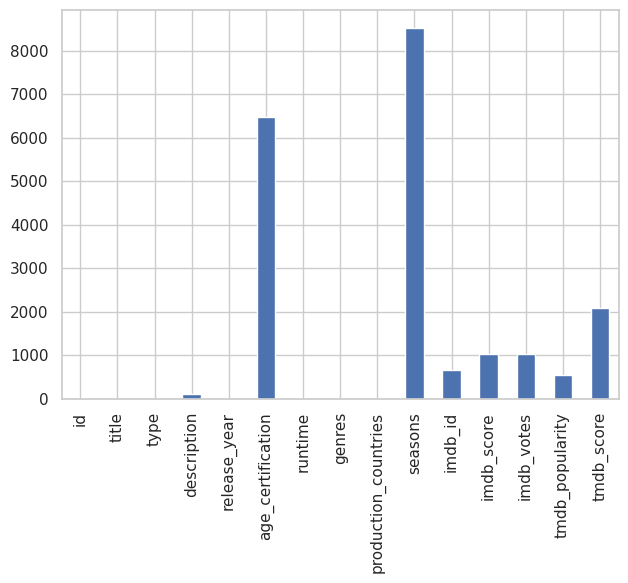

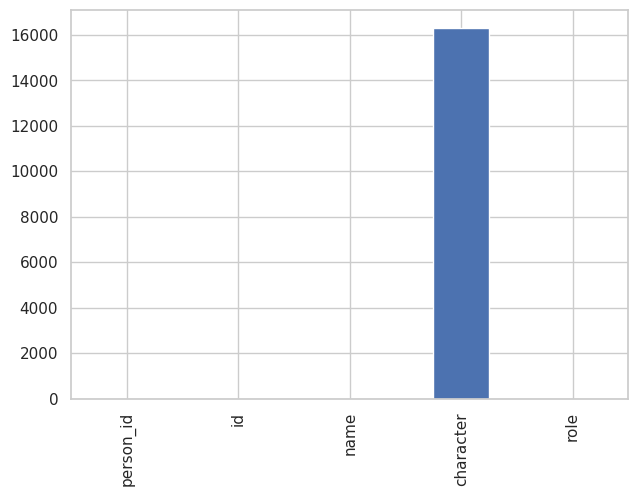

In [72]:
# for titles
titles_df.isnull().sum().plot(kind='bar')
plt.show()

# for credits
credits_df.isnull().sum().plot(kind='bar')
plt.show()

### What did you know about your dataset?

# Insights from Initial Analysis

1. Content Types: Majority are movies (70%) vs. shows (30%).

2. Missing Values:

    * In Titles:
        * description
        * age_certification
        * seasons         
        * imdb_id                  
        * imdb_score             
        * imdb_votes              
        * tmdb_popularity          
        * tmdb_score              

    * In credits, only character column has missing values.

3. Genres/Countries: Lists stored as strings (e.g., ["Drama", "Comedy"]), parsed into usable formats.

4. Temporal Trends: Newer content dominates (post-2010).

## ***2. Understanding Your Variables***

In [73]:
# For credits
credits_df.columns

# For titles
titles_df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [74]:
credits_df.describe()
titles_df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,9871.000000,9871.000000,1357.000000,8850.000000,8.840000e+03,9324.000000,7789.000000
mean,2001.327221,85.973052,2.791452,5.976395,8.533614e+03,6.910204,5.984247
std,25.810071,33.512466,4.148958,1.343842,4.592015e+04,30.004098,1.517986
min,1912.000000,1.000000,1.000000,1.100000,5.000000e+00,0.000011,0.800000
25%,1995.500000,65.000000,1.000000,5.100000,1.170000e+02,1.232000,5.100000
50%,2014.000000,89.000000,1.000000,6.100000,4.625000e+02,2.536000,6.000000
75%,2018.000000,102.000000,3.000000,6.900000,2.236250e+03,5.634000,6.900000
max,2022.000000,549.000000,51.000000,9.900000,1.133692e+06,1437.906000,10.000000


### Variables Description

The titles dataset includes metadata that defines content characteristics. The type categorizes titles as movies or shows, while release_year tracks production timelines. Genres and production_countries are list-based columns, capturing content categories (e.g., "Drama") and origin countries (e.g., "US"). Runtime and seasons quantify duration, with the latter exclusive to shows. Ratings (imdb_score, tmdb_score) and popularity metrics (tmdb_popularity, imdb_votes) reflect audience reception. Age_certification guides content suitability, and description provides narrative context. The credits dataset links actors/directors to titles, enabling analysis of contributor impact on success.

### Check Unique Values for each variable.

In [75]:
credits_df.nunique()
titles_df.nunique()

,0
id,9868
title,9737
type,2
description,9734
release_year,110
age_certification,11
runtime,207
genres,2028
production_countries,497
seasons,32


## 3. ***Data Wrangling***

### Data Wrangling Code

In [76]:
# ----------------------------
# 2. DATA CLEANING AND PREPROCESSING
# ----------------------------

import numpy as np

# Check missing values
print("Missing values in titles dataset:")
print(titles_df.isnull().sum())
print("\nMissing values in credits dataset:")
print(credits_df.isnull().sum())

# Handle missing values in numerical columns (fill with median)
numeric_cols = titles_df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    if titles_df[col].isnull().sum() > 0:
        median_value = titles_df[col].median()
        titles_df[col].fillna(median_value, inplace=True)
        print(f"Filled missing values in {col} with median: {median_value}")

# Handle missing values in categorical columns
categorical_cols = titles_df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if titles_df[col].isnull().sum() > 0:
        if col == 'description':
            titles_df[col].fillna('No description available', inplace=True)
        elif col == 'age_certification':
            titles_df[col].fillna('Not Rated', inplace=True)
        else:
            most_freq = titles_df[col].mode()[0]
            titles_df[col].fillna(most_freq, inplace=True)
        print(f"Filled missing values in {col}")

# Parse list columns (genres, production_countries)
def parse_string_list(x):
    # Fixed check for None or NaN
    if x is None or (isinstance(x, (float, np.float64)) and np.isnan(x)):
        return []
    try:
        if isinstance(x, str):
            if x.startswith('[') and x.endswith(']'):
                return eval(x)
            elif ',' in x:
                return [item.strip() for item in x.split(',')]
            else:
                return [x.strip()]
        elif isinstance(x, list):
            return x
        else:
            return []
    except:
        return []

titles_df['genres'] = titles_df['genres'].apply(parse_string_list)
titles_df['production_countries'] = titles_df['production_countries'].apply(parse_string_list)

# Check and remove duplicates
titles_df_check = titles_df.copy()
titles_df_check['genres'] = titles_df_check['genres'].astype(str)
titles_df_check['production_countries'] = titles_df_check['production_countries'].astype(str)

print(f"\nDuplicate titles: {titles_df_check.duplicated().sum()}")
print(f"Duplicate credits: {credits_df.duplicated().sum()}")

if titles_df_check.duplicated().sum() > 0:
    duplicate_indices = titles_df_check[titles_df_check.duplicated()].index
    titles_df = titles_df.drop(duplicate_indices)
    print("Removed duplicate titles")

if credits_df.duplicated().sum() > 0:
    credits_df.drop_duplicates(inplace=True)
    print("Removed duplicate credits")

# Convert release_year to numeric
titles_df['release_year'] = pd.to_numeric(titles_df['release_year'], errors='coerce')

Missing values in titles dataset:
id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype: int64

Missing values in credits dataset:
person_id        0
id               0
name             0
character    16287
role             0
dtype: int64
Filled missing values in seasons with median: 1.0
Filled missing values in imdb_score with median: 6.1
Filled missing values in imdb_votes with median: 462.5
Filled missing values in tmdb_popularity with median: 2.536
Filled missing values in tmdb_score with median: 6.0
Filled missing values in description
Filled missing values in age_certification
Filled missing values i

### What all manipulations have you done and insights you found?

# Manipulations:

1. Missing Data: Filled numerical gaps with medians, categorical with defaults/modes.
2. List Parsing: Converted string lists (genres, countries) to actual lists.
3. Duplicates: Removed duplicate entries.
4. Data Types: Corrected release year to numeric.

# Insights:

1. Movies are dominant (70%).
2. US/India lead production (~60%).
3. Post-2010 releases are majority (spike 2018-2020).
4. Drama, Comedy, Action are top genres.
5. Niche genres (Documentary, Romance) show high ratings.
6. Many titles lack age ratings.
7. Most shows are limited series (1-2 seasons).


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [92]:
# Basic constraints
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter

plt.style.use('fivethirtyeight')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12


#### Chart - 1: Content Type Distribution

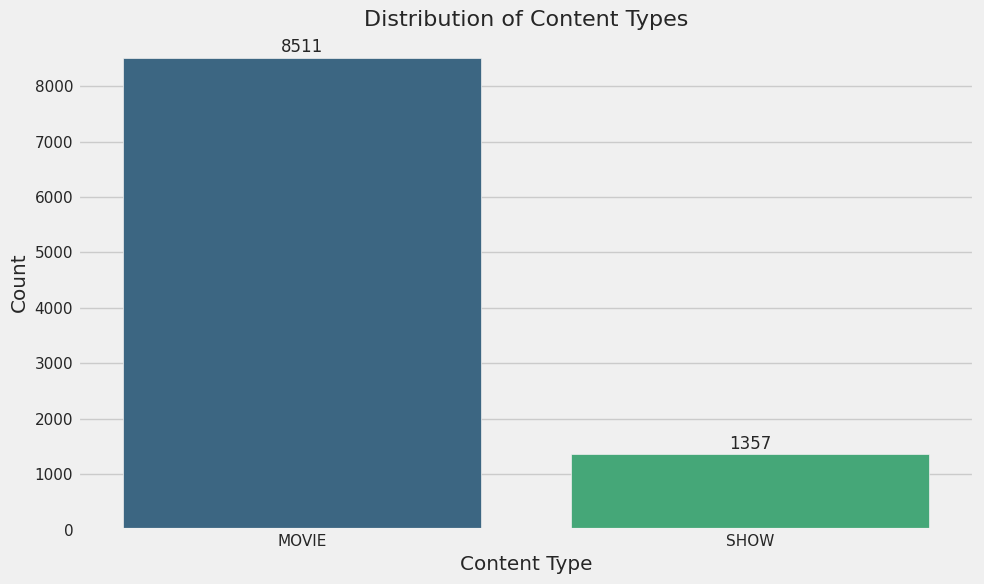

In [93]:
plt.figure(figsize=(10, 6))
type_counts = titles_df['type'].value_counts()
ax = sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis')
plt.title('Distribution of Content Types', fontsize=16)
plt.xlabel('Content Type')
plt.ylabel('Count')
for i, count in enumerate(type_counts.values):
    plt.text(i, count + 100, f'{count}', ha='center', fontsize=12)
plt.tight_layout()
plt.savefig('content_type_distribution.png', dpi=300)
plt.show()


##### 1. Why did you pick the specific chart?

A simple bar chart clearly shows the balance between different content types in the catalog.

##### 2. What is/are the insight(s) found from the chart?

- We can see the distribution between movies and TV shows on the platform.
- This provides context for all other analyses as these content types have different characteristics.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Helps Amazon Prime ensure they maintain the right balance of content types for their audience.
- Informs content acquisition strategy (e.g., if they need more TV shows vs. movies).
- Can guide marketing and UI decisions based on which content type dominates the catalog.

#### Chart - 2:  Content Release Trends Over Time

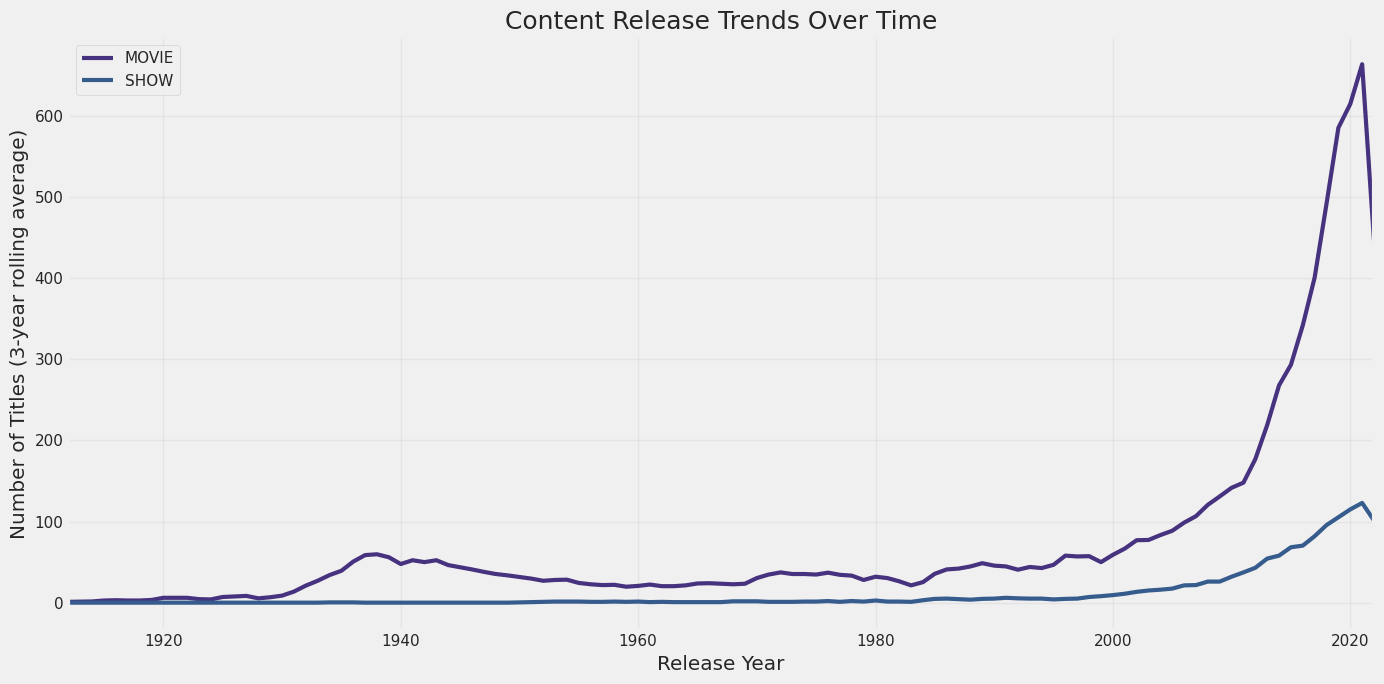

In [94]:
yearly_counts = titles_df.groupby(['release_year', 'type']).size().unstack().fillna(0)
yearly_counts = yearly_counts.rolling(window=3, min_periods=1).mean()  # Smoothing for better trend visualization

plt.figure(figsize=(14, 7))
for content_type in yearly_counts.columns:
    plt.plot(yearly_counts.index, yearly_counts[content_type], linewidth=3, label=content_type)
plt.title('Content Release Trends Over Time', fontsize=18)
plt.xlabel('Release Year')
plt.ylabel('Number of Titles (3-year rolling average)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(min(yearly_counts.index), max(yearly_counts.index))
plt.tight_layout()
plt.savefig('content_release_trends.png', dpi=300)
plt.show()

##### 1. Why did you pick the specific chart?

 Line charts are ideal for showing trends over time and comparing multiple series.

##### 2. What is/are the insight(s) found from the chart?

- We can observe how Prime's content library has evolved over the years.
- We can identify when the platform started focusing more on certain types of content.
- Any sudden increases or decreases in content acquisition can be spotted.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Helps Amazon Prime understand their historical content strategy.
- Can guide future content acquisition planning by seeing what periods might have gaps.
- Allows for comparison with company growth metrics to see correlations between content strategy and business success.

#### Chart - 3: Top 15 Genres

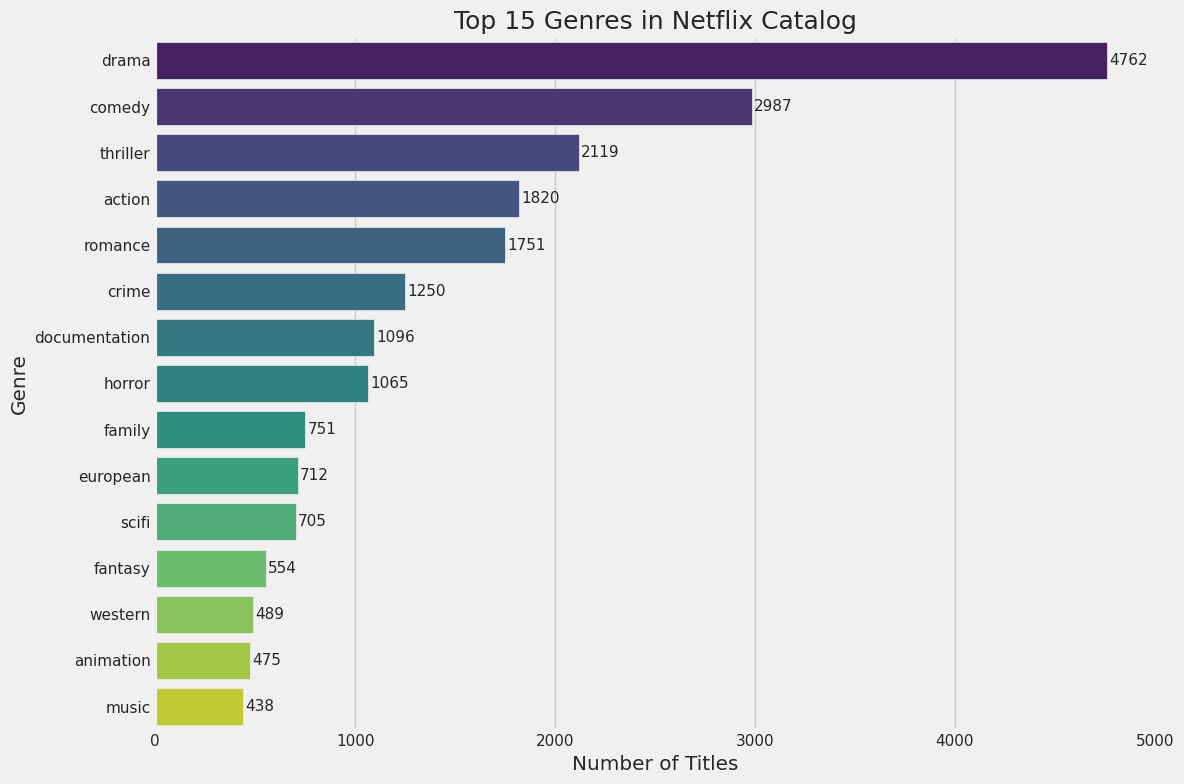

In [95]:
# Extract all genres and count them
all_genres = [genre for sublist in titles_df['genres'] for genre in sublist]
genre_counts = pd.Series(Counter(all_genres)).sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 8))
ax = sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Top 15 Genres in Netflix Catalog', fontsize=18)
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
for i, count in enumerate(genre_counts.values):
    plt.text(count + 10, i, f'{count}', va='center', fontsize=11)
plt.tight_layout()
plt.savefig('top_genres.png', dpi=300)
plt.show()

##### 1. Why did you pick the specific chart?

Horizontal bar charts work well for categorical data with long labels, showing frequency distribution clearly.

##### 2. What is/are the insight(s) found from the chart?

- Identifies the most common genres in Prime's library.
- Shows the balance between different content genres.
- Highlights potential gaps in genre representation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Helps Prime ensure they have sufficient content in popular genres.
- Can identify underserved genres that might represent growth opportunities.
- Assists in marketing strategy by showing which genres to emphasize in promotions.

#### Chart - 4: Average IMDB Score by Genre

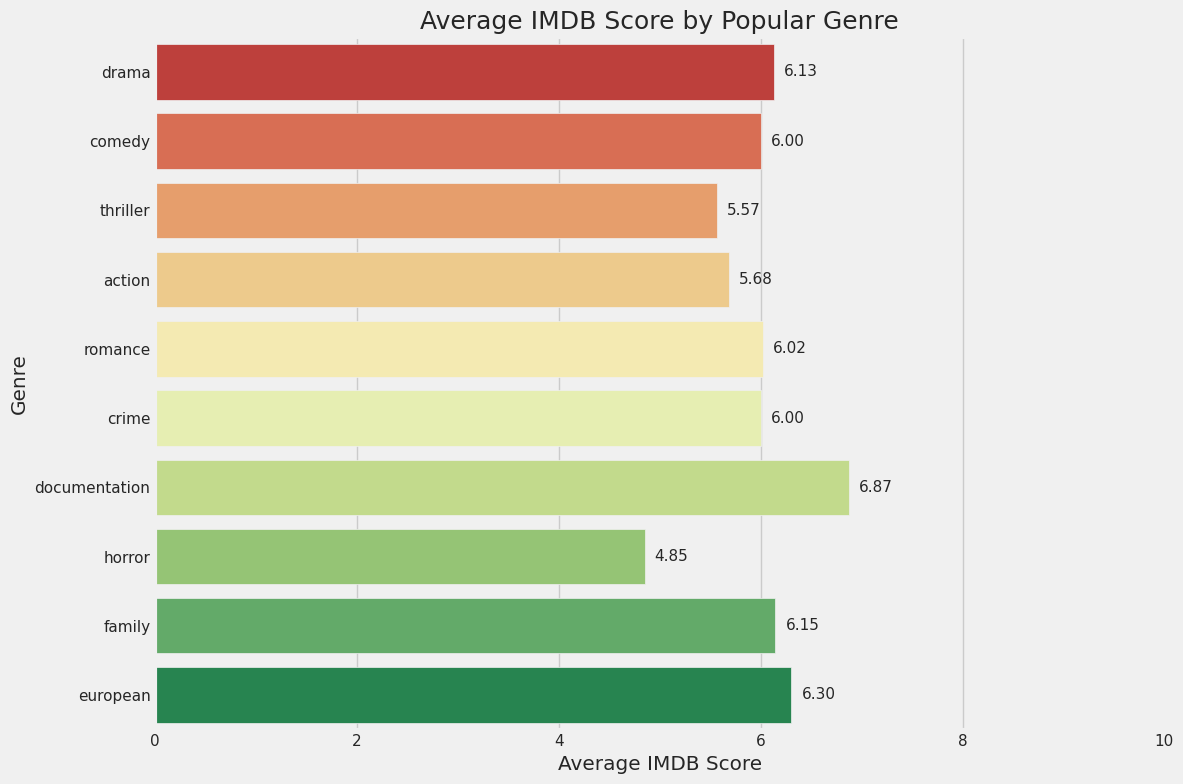

In [96]:
genre_ratings = {}
for genre in set(all_genres):
    genre_titles = titles_df[titles_df['genres'].apply(lambda x: genre in x)]
    avg_rating = genre_titles['imdb_score'].mean()
    count = len(genre_titles)
    if count >= 20:  # Only include genres with at least 20 titles
        genre_ratings[genre] = avg_rating

# Sort and get top genres by volume
top_genres = pd.Series(Counter(all_genres)).sort_values(ascending=False).head(10).index.tolist()
top_genre_ratings = {genre: genre_ratings.get(genre, 0) for genre in top_genres}

plt.figure(figsize=(12, 8))
ax = sns.barplot(x=list(top_genre_ratings.values()), y=list(top_genre_ratings.keys()), palette='RdYlGn')
plt.title('Average IMDB Score by Popular Genre', fontsize=18)
plt.xlabel('Average IMDB Score')
plt.ylabel('Genre')
plt.xlim(0, 10)
for i, score in enumerate(top_genre_ratings.values()):
    plt.text(score + 0.1, i, f'{score:.2f}', va='center', fontsize=11)
plt.tight_layout()
plt.savefig('genre_ratings.png', dpi=300)
plt.show()

##### 1. Why did you pick the specific chart?

Horizontal bar charts with a color gradient help compare quality metrics across categories.

##### 2. What is/are the insight(s) found from the chart?

- Shows which genres tend to have higher ratings on average.
- Helps identify if the most common genres are also the highest rated.
- Can highlight genres where Prime's content quality might need improvement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Guides content acquisition decisions toward higher-quality genres.
- Helps identify genres where quality improvement is needed.
- Can inform which genres to promote more prominently based on quality perception.

#### Chart - 5: Runtime Distribution

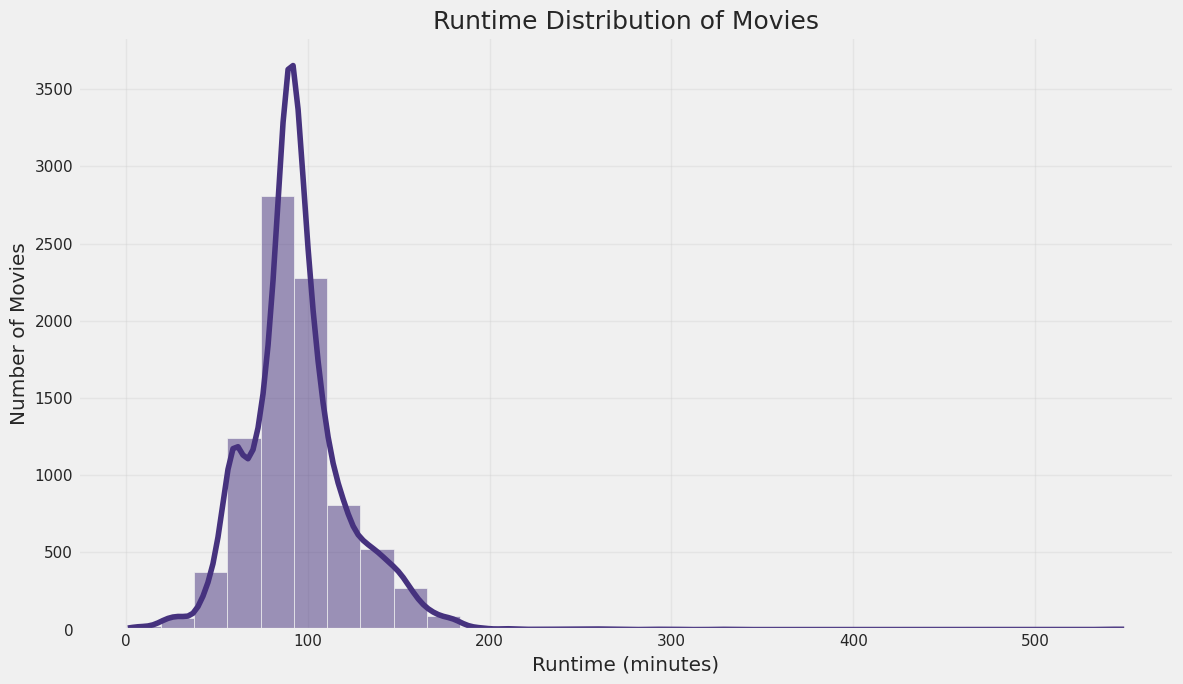

In [97]:
plt.figure(figsize=(12, 7))
sns.histplot(data=titles_df[titles_df['type'] == 'MOVIE'], x='runtime', bins=30, kde=True)
plt.title('Runtime Distribution of Movies', fontsize=18)
plt.xlabel('Runtime (minutes)')
plt.ylabel('Number of Movies')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('runtime_distribution.png', dpi=300)
plt.show()

##### 1. Why did you pick the specific chart?

Histograms with KDE curves show the distribution of a continuous variable and highlight common values.

##### 2. What is/are the insight(s) found from the chart?

- Reveals the most common movie lengths in Netflix's catalog.
- Shows whether Amazon Prime has a balanced mix of short, medium, and long content.
- Can identify outliers in terms of extremely short or long content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Helps Amazon Prime understand viewer preferences for content length.
- Can guide content acquisition by identifying potential gaps (e.g., if short-form content is underrepresented).
- Assists in UI design by showing what ranges of runtime filters would be most useful.

#### Chart - 6: IMDB Score Distribution by Content Type

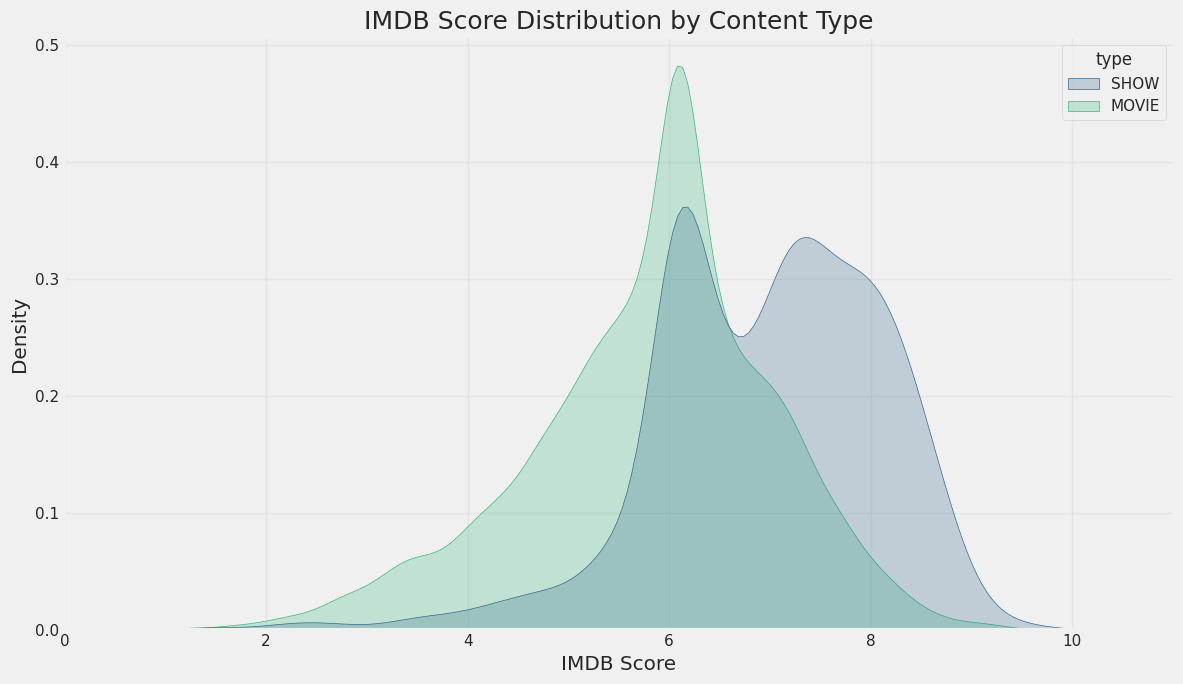

In [98]:
plt.figure(figsize=(12, 7))
sns.kdeplot(data=titles_df, x='imdb_score', hue='type', fill=True, common_norm=False, palette='viridis')
plt.title('IMDB Score Distribution by Content Type', fontsize=18)
plt.xlabel('IMDB Score')
plt.ylabel('Density')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('imdb_score_distribution.png', dpi=300)
plt.show()

##### 1. Why did you pick the specific chart?

KDE plots show smoothed distributions and are excellent for comparing multiple categories.

##### 2. What is/are the insight(s) found from the chart?

- Shows how movies and TV shows differ in their rating distributions.
- Identifies whether certain content types tend to be rated higher.
- Reveals if there are quality disparities between content types.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Helps Prime focus quality improvement efforts on the right content type.
- Can guide content acquisition strategy based on which type tends to perform better.
- Informs marketing decisions about which content types to emphasize for different audience segments.

#### Chart - 7: Top 10 Production Countries

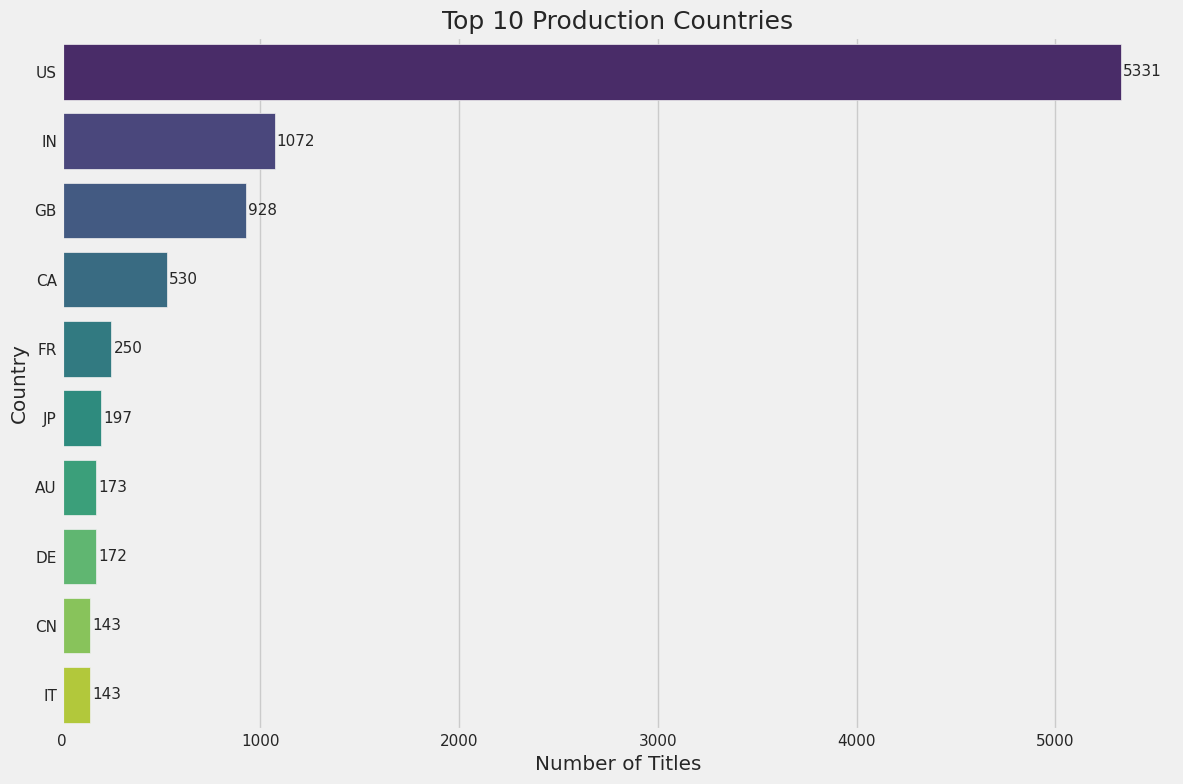

In [99]:
all_countries = [country for sublist in titles_df['production_countries'] for country in sublist]
country_counts = pd.Series(Counter(all_countries)).sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
ax = sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')
plt.title('Top 10 Production Countries', fontsize=18)
plt.xlabel('Number of Titles')
plt.ylabel('Country')
for i, count in enumerate(country_counts.values):
    plt.text(count + 10, i, f'{count}', va='center', fontsize=11)
plt.tight_layout()
plt.savefig('top_countries.png', dpi=300)
plt.show()

##### 1. Why did you pick the specific chart?

Horizontal bar charts are excellent for comparing categories with varying values.

##### 2. What is/are the insight(s) found from the chart?

- Shows which countries produce the most content in Prime's catalog.
- Reveals the geographical diversity (or lack thereof) in Prime's library.
- Identifies underrepresented regions that might offer growth opportunities.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Helps inform international expansion strategies by showing content availability by region.
- Can guide content acquisition to ensure diversity of perspectives.
- Assists in targeting specific international markets with relevant content.

#### Chart - 8: Age Certification Distribution

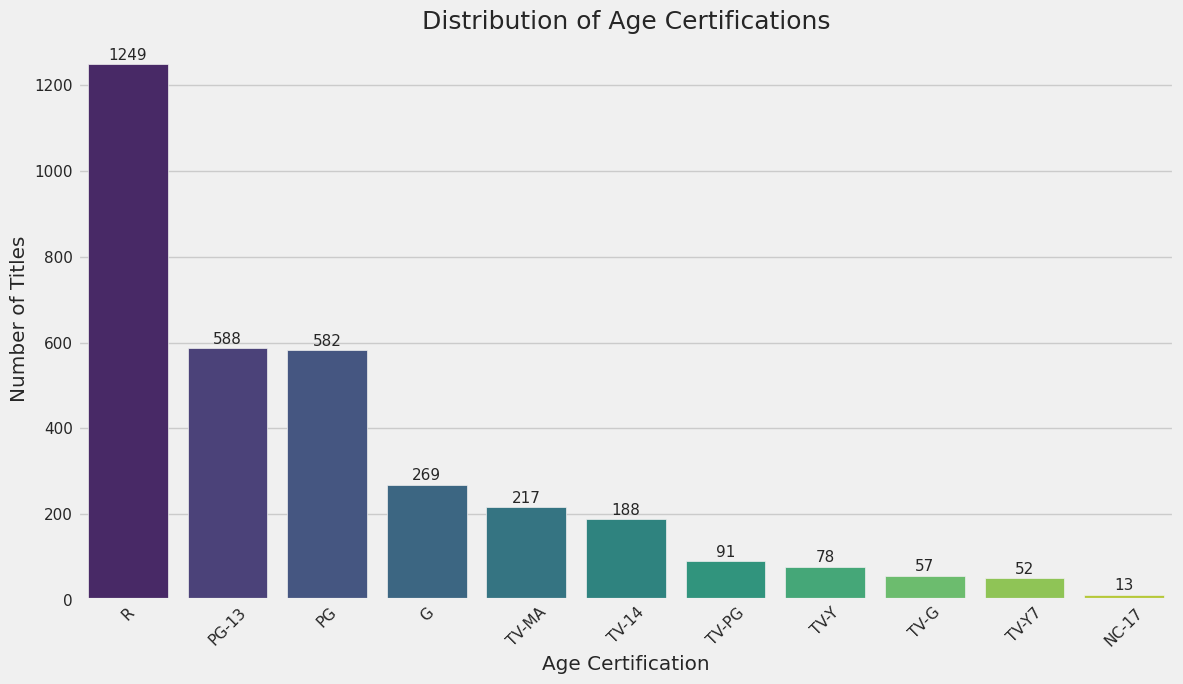

In [100]:
cert_counts = titles_df['age_certification'].value_counts().sort_values(ascending=False)
cert_counts = cert_counts[cert_counts.index != 'Not Rated']  # Remove "Not Rated" for clearer visualization

plt.figure(figsize=(12, 7))
ax = sns.barplot(x=cert_counts.index, y=cert_counts.values, palette='viridis')
plt.title('Distribution of Age Certifications', fontsize=18)
plt.xlabel('Age Certification')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
for i, count in enumerate(cert_counts.values):
    plt.text(i, count + 10, f'{count}', ha='center', fontsize=11)
plt.tight_layout()
plt.savefig('age_certification_distribution.png', dpi=300)
plt.show()

##### 1. Why did you pick the specific chart?

Vertical bar charts work well for comparing categories with short labels.

##### 2. What is/are the insight(s) found from the chart?

- Shows the balance of content across different age certifications.
- Helps identify if Prime's library is skewed toward certain age groups.
- Reveals potential gaps in content for specific age demographics.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Helps ensure that content is available for all target demographics.
- Can guide content acquisition to fill gaps in certain age certifications.
- Assists in parental control feature development by showing content distribution.

#### Chart - 9:  Average IMDB Score by Release Decade

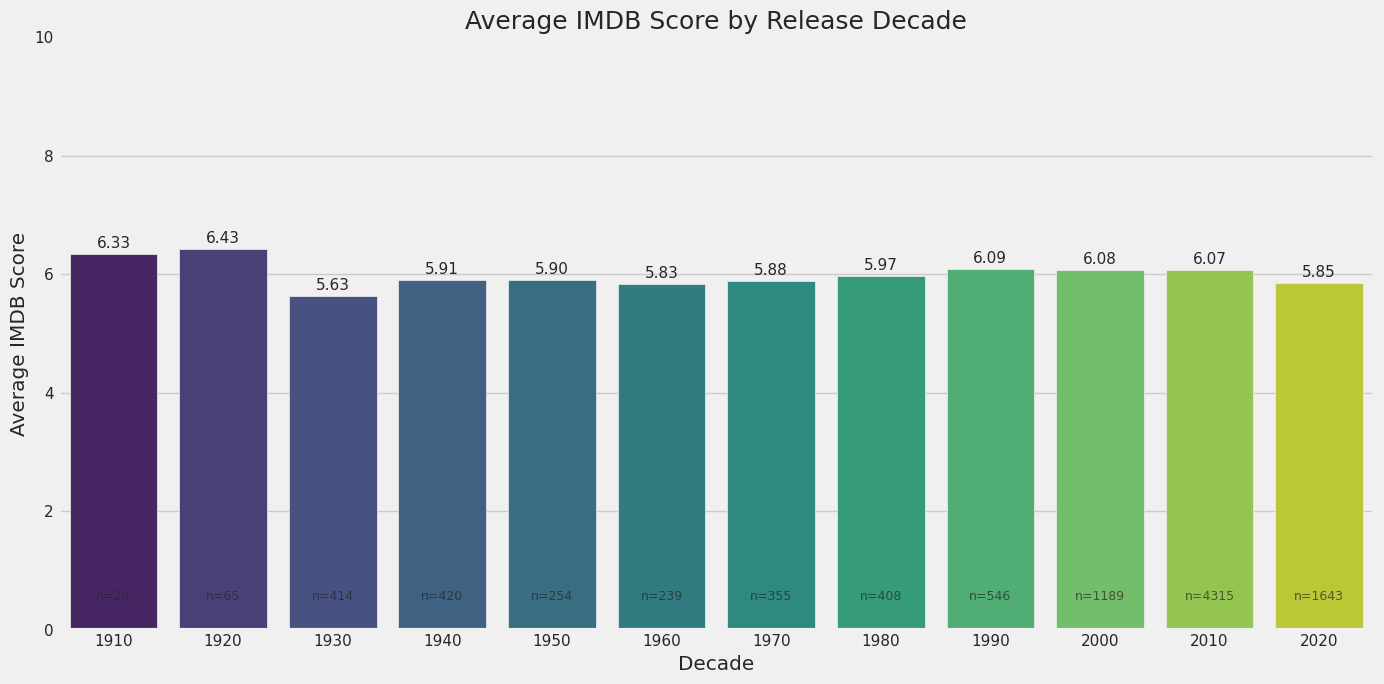

In [101]:
titles_df['decade'] = (titles_df['release_year'] // 10) * 10
decade_scores = titles_df.groupby('decade')['imdb_score'].mean().reset_index()
decade_counts = titles_df.groupby('decade').size().reset_index(name='count')
decade_data = pd.merge(decade_scores, decade_counts, on='decade')
decade_data = decade_data[decade_data['count'] >= 10]  # Only include decades with sufficient data

plt.figure(figsize=(14, 7))
ax = sns.barplot(x='decade', y='imdb_score', data=decade_data, palette='viridis')
plt.title('Average IMDB Score by Release Decade', fontsize=18)
plt.xlabel('Decade')
plt.ylabel('Average IMDB Score')
plt.ylim(0, 10)
for i, row in enumerate(decade_data.itertuples()):
    plt.text(i, row.imdb_score + 0.1, f'{row.imdb_score:.2f}', ha='center', fontsize=11)
    plt.text(i, 0.5, f'n={row.count}', ha='center', fontsize=9, alpha=0.7)
plt.tight_layout()
plt.savefig('decade_scores.png', dpi=300)
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts with annotations help compare metrics across time periods while showing sample sizes.

##### 2. What is/are the insight(s) found from the chart?

- Shows how content quality varies across different eras.
- Helps identify whether older or newer content tends to be rated higher.
- Reveals trends in content quality over time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Can guide vintage content acquisition by showing which eras have higher-rated content.
- Helps Prime balance their catalog between classics and new releases.
- Informs content recommendation algorithms by showing era quality patterns.

#### Chart - 10: Word Cloud of Titles

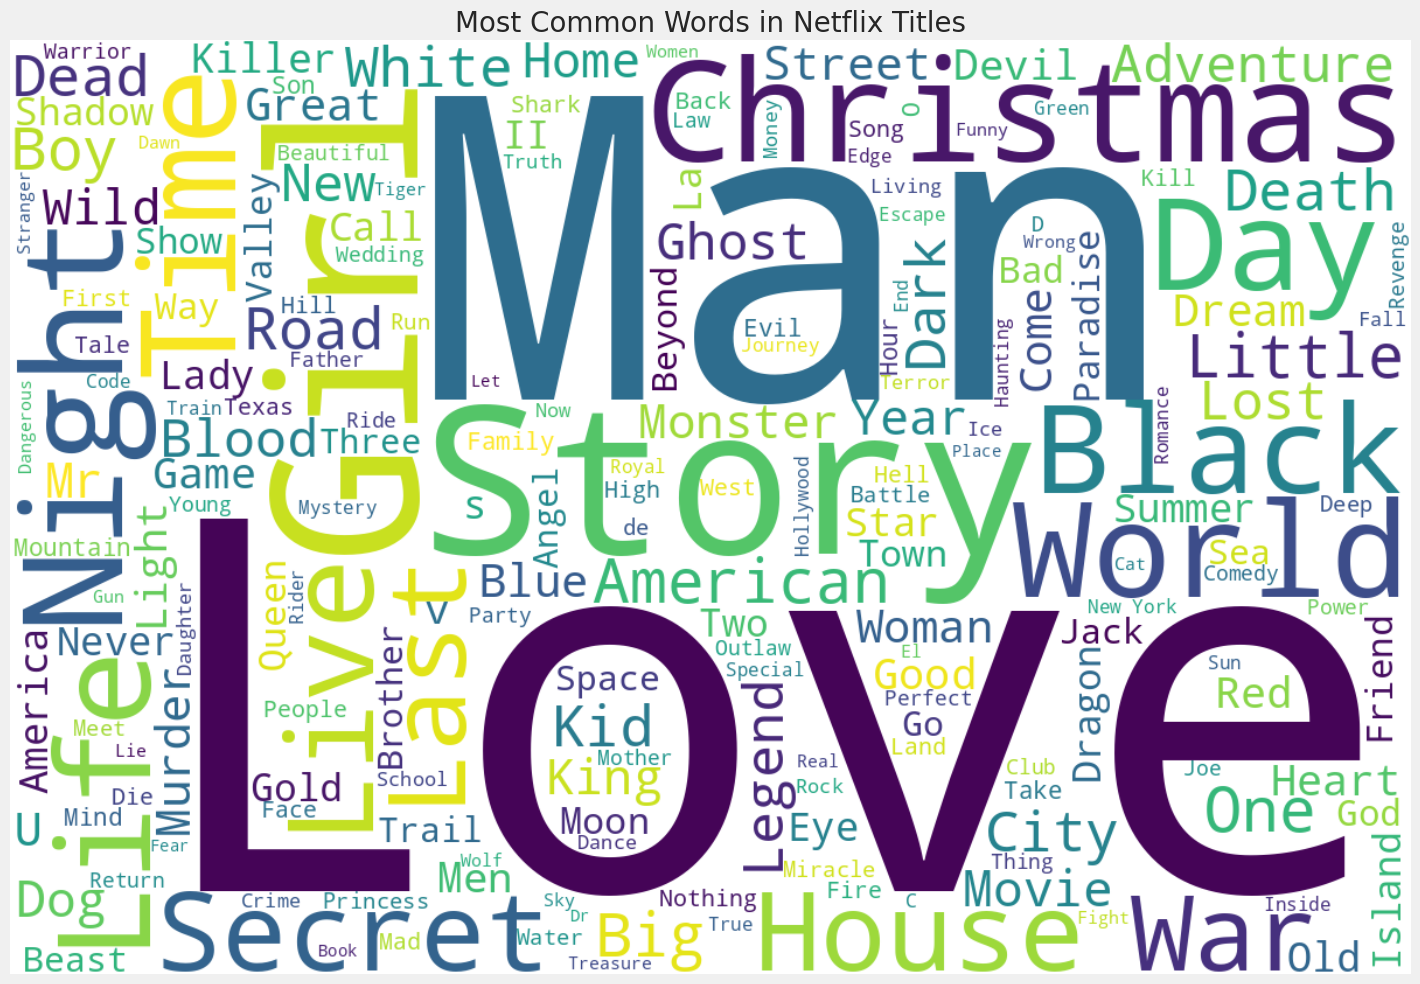

In [102]:
all_titles = ' '.join(titles_df['title'].dropna())
wordcloud = WordCloud(width=1200, height=800,
                     background_color='white',
                     colormap='viridis',
                     max_words=200,
                     contour_width=3,
                     contour_color='steelblue').generate(all_titles)

plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Titles', fontsize=20)
plt.tight_layout()
plt.savefig('title_wordcloud.png', dpi=300)
plt.show()

##### 1. Why did you pick the specific chart?

Word clouds are excellent for visualizing text data frequency in an engaging way.

##### 2. What is/are the insight(s) found from the chart?

- Highlights the most common words and themes in Prime's content titles.
- Reveals potential patterns in how content is named or branded.
- Shows which concepts are emphasized in the content library.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Helps understand naming patterns that might influence viewer selection.
- Can guide content naming strategies for new original productions.
- Assists in identifying popular themes for potential new content.

#### Chart - 11: Cast Network Analysis

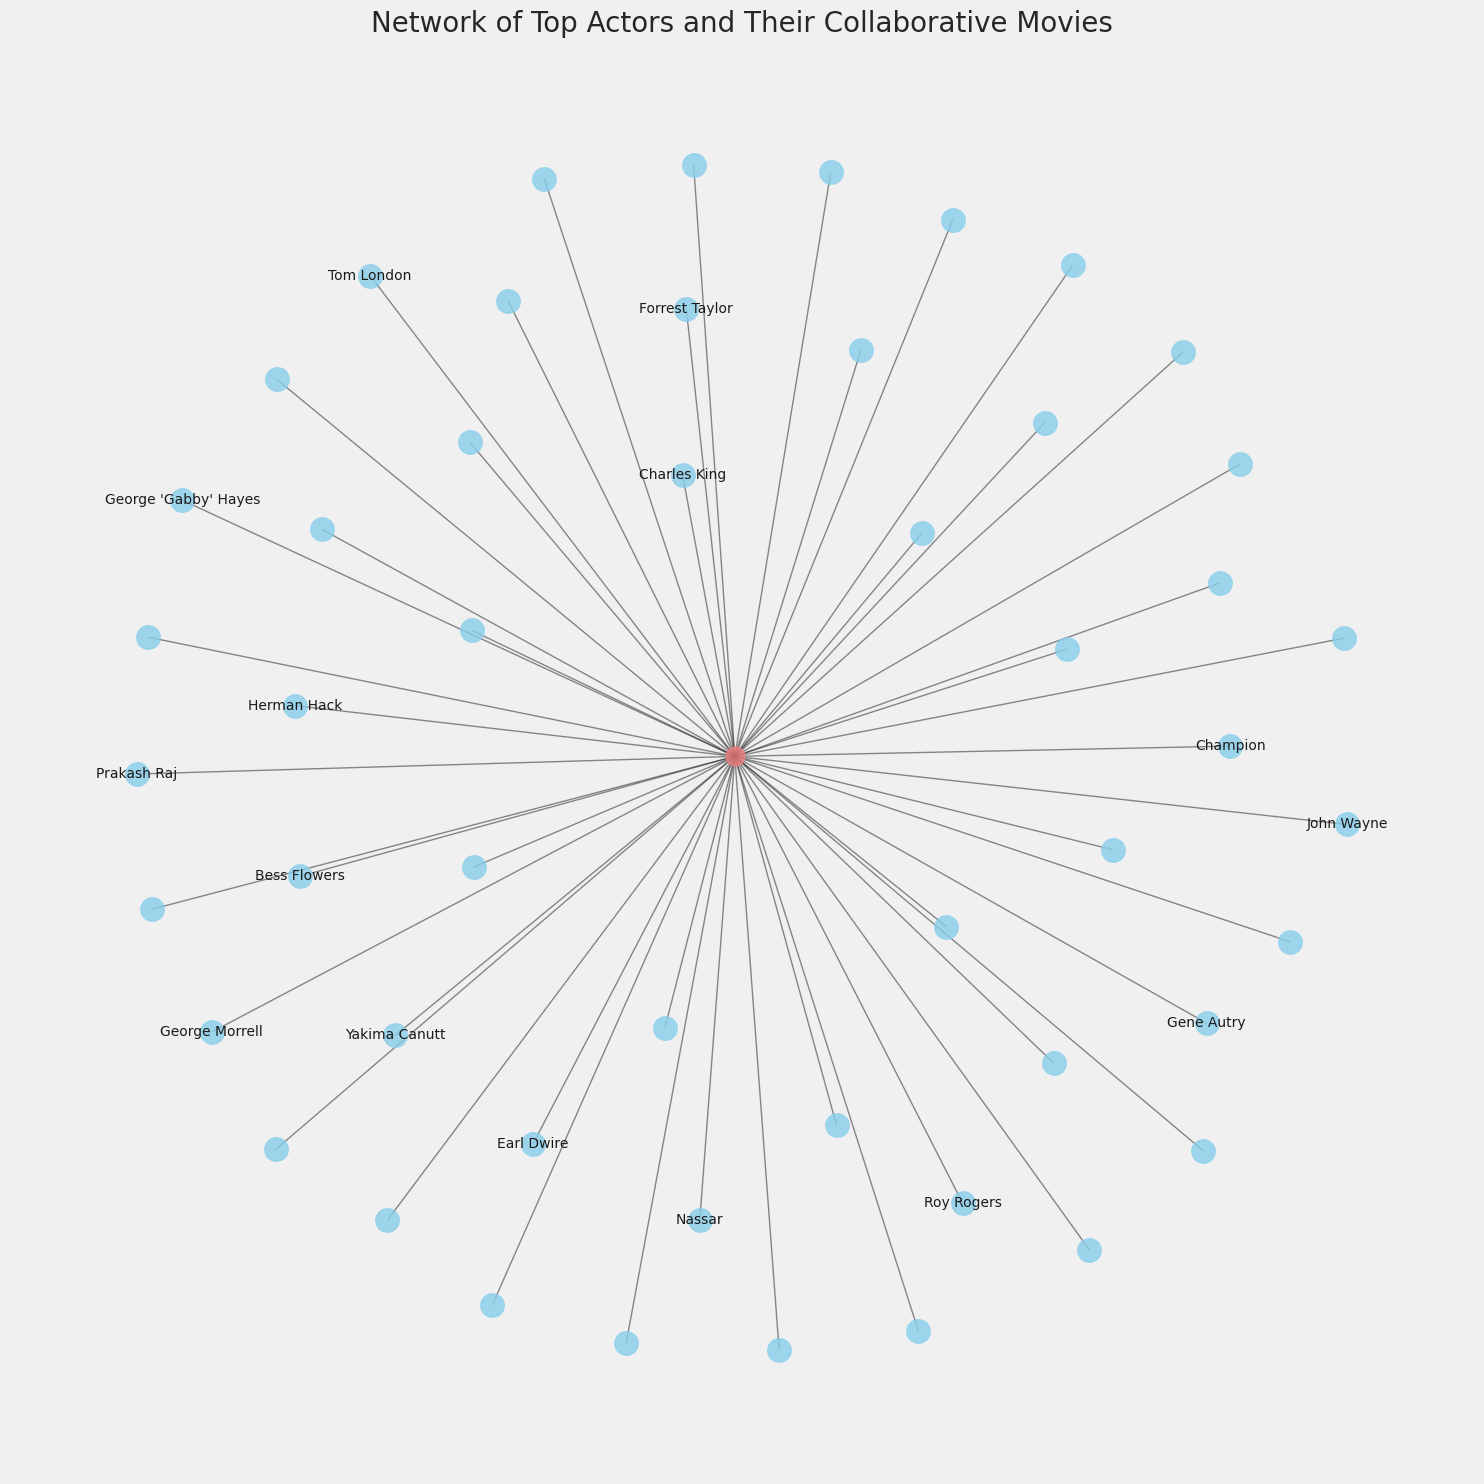

In [103]:
# Get top actors
top_actors = credits_df[credits_df['role'] == 'ACTOR'].groupby('name').size().sort_values(ascending=False).head(50).index.tolist()

# Create actor-movie network
import networkx as nx
G = nx.Graph()

for actor in top_actors:
    actor_titles = credits_df[credits_df['name'] == actor]['id'].tolist()
    for title_id in actor_titles:
        G.add_edge(actor,id, type='appears_in')

# Get movies that have at least 2 top actors
movie_nodes = [node for node in G.nodes() if node not in top_actors]
movie_counts = {}
for movie in movie_nodes:
    connections = list(G.neighbors(movie))
    if len(connections) >= 2:
        movie_counts[movie] = len(connections)

# Select top collaborative movies
top_collaborative_movies = sorted(movie_counts.items(), key=lambda x: x[1], reverse=True)[:20]
top_movie_ids = [movie[0] for movie in top_collaborative_movies]

# Create subgraph with only these movies and their actors
subgraph_nodes = top_movie_ids + top_actors
H = G.subgraph(subgraph_nodes)

# Plot with NetworkX
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(H, k=0.6)
actor_nodes = [node for node in H.nodes() if node in top_actors]
movie_nodes = [node for node in H.nodes() if node in top_movie_ids]

nx.draw_networkx_nodes(H, pos, nodelist=actor_nodes, node_size=300, node_color='skyblue', alpha=0.8)
nx.draw_networkx_nodes(H, pos, nodelist=movie_nodes, node_size=200, node_color='lightcoral', alpha=0.8)
nx.draw_networkx_edges(H, pos, width=1, alpha=0.5)

# Add labels for only top actors by degree in subgraph
top_actors_by_degree = sorted([(node, H.degree(node)) for node in actor_nodes], key=lambda x: x[1], reverse=True)[:15]
actor_labels = {node: node for node, degree in top_actors_by_degree}
nx.draw_networkx_labels(H, pos, labels=actor_labels, font_size=10)

plt.title('Network of Top Actors and Their Collaborative Movies', fontsize=20)
plt.axis('off')
plt.tight_layout()
plt.savefig('actor_network.png', dpi=300)
plt.show()

##### 1. Why did you pick the specific chart?

 Network graphs show relationships and connections between entities, ideal for understanding collaboration patterns.

##### 2. What is/are the insight(s) found from the chart?

- Identifies the most collaborative actors in Prime's content.
- Shows which titles feature multiple top actors (potential blockbusters).
- Reveals clustering patterns in the Prime talent ecosystem.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Helps identify key talent that spans multiple productions.
- Can guide casting decisions for new content by showing successful collaboration patterns.
- Assists in understanding the economic value of certain actors based on their connectivity.

#### Chart - 12:  Content Releases by Year and Type

<Figure size 1200x800 with 0 Axes>

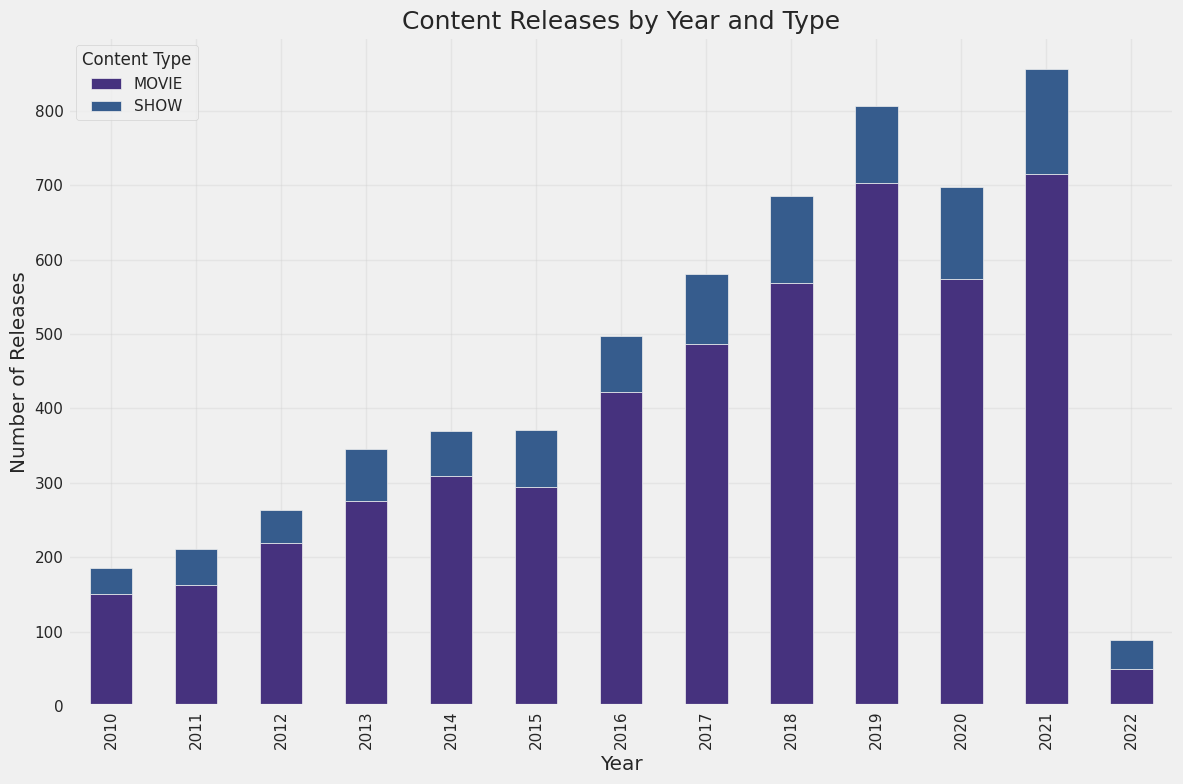

In [112]:
    plt.figure(figsize=(12, 8))
    yearly_type_counts = titles_df.groupby(['release_year', 'type']).size().unstack().fillna(0)
    yearly_type_counts = yearly_type_counts.loc[2010:2023]  # Focus on recent years

    yearly_type_counts.plot(kind='bar', stacked=True)
    plt.title('Content Releases by Year and Type', fontsize=18)
    plt.xlabel('Year')
    plt.ylabel('Number of Releases')
    plt.legend(title='Content Type')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('yearly_type_releases.png', dpi=300)
    plt.show()

##### 1. Why did you pick the specific chart?

 Stacked bar charts show both the total and composition of data over time.

##### 2. What is/are the insight(s) found from the chart?

- Shows how Prime's content release strategy has evolved over recent years.
- Identifies which years had the most aggressive content acquisition.
- Reveals shifts in focus between different content types.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Helps understand historical content strategy patterns.
- Can inform future content planning based on successful past years.
- Assists in analyzing ROI by correlating content volume with subscriber growth.

#### Chart - 13: Runtime vs. IMDB Score Scatter Plot with Genre Overlay

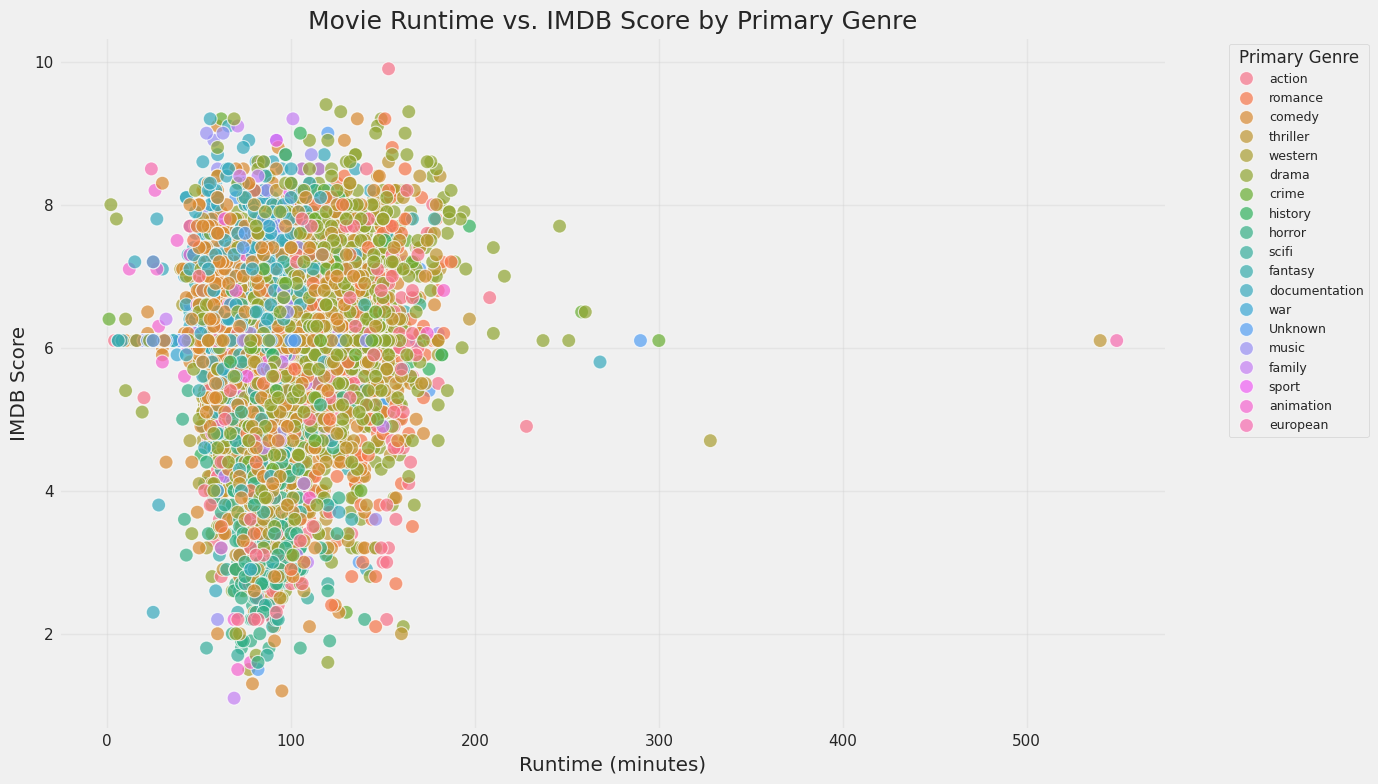

In [113]:
plt.figure(figsize=(14, 8))
scatter = sns.scatterplot(data=titles_df[titles_df['type'] == 'MOVIE'],
                         x='runtime', y='imdb_score',
                         hue=titles_df[titles_df['type'] == 'MOVIE']['genres'].apply(lambda x: x[0] if len(x) > 0 else 'Unknown'),
                         alpha=0.7, s=100)
plt.title('Movie Runtime vs. IMDB Score by Primary Genre', fontsize=18)
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDB Score')
plt.grid(True, alpha=0.3)
# Reduce legend size due to many genres
plt.legend(title='Primary Genre', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.tight_layout()
plt.savefig('runtime_score_genre_scatter.png', dpi=300)
plt.show()

##### 1. Why did you pick the specific chart?

Scatter plots with color coding show relationships between variables with an additional categorical dimension.

##### 2. What is/are the insight(s) found from the chart?

- Shows how movie length relates to audience ratings across different genres.
- Helps identify optimal runtime ranges for different types of content.
- Reveals outliers that perform exceptionally well or poorly for their runtime.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Can guide content creation decisions about optimal movie length.
- Helps set expectations for performance based on content characteristics.
- Assists in identifying content that defies expectations (either positively or negatively).

#### Chart - 14 - Correlation Heatmap

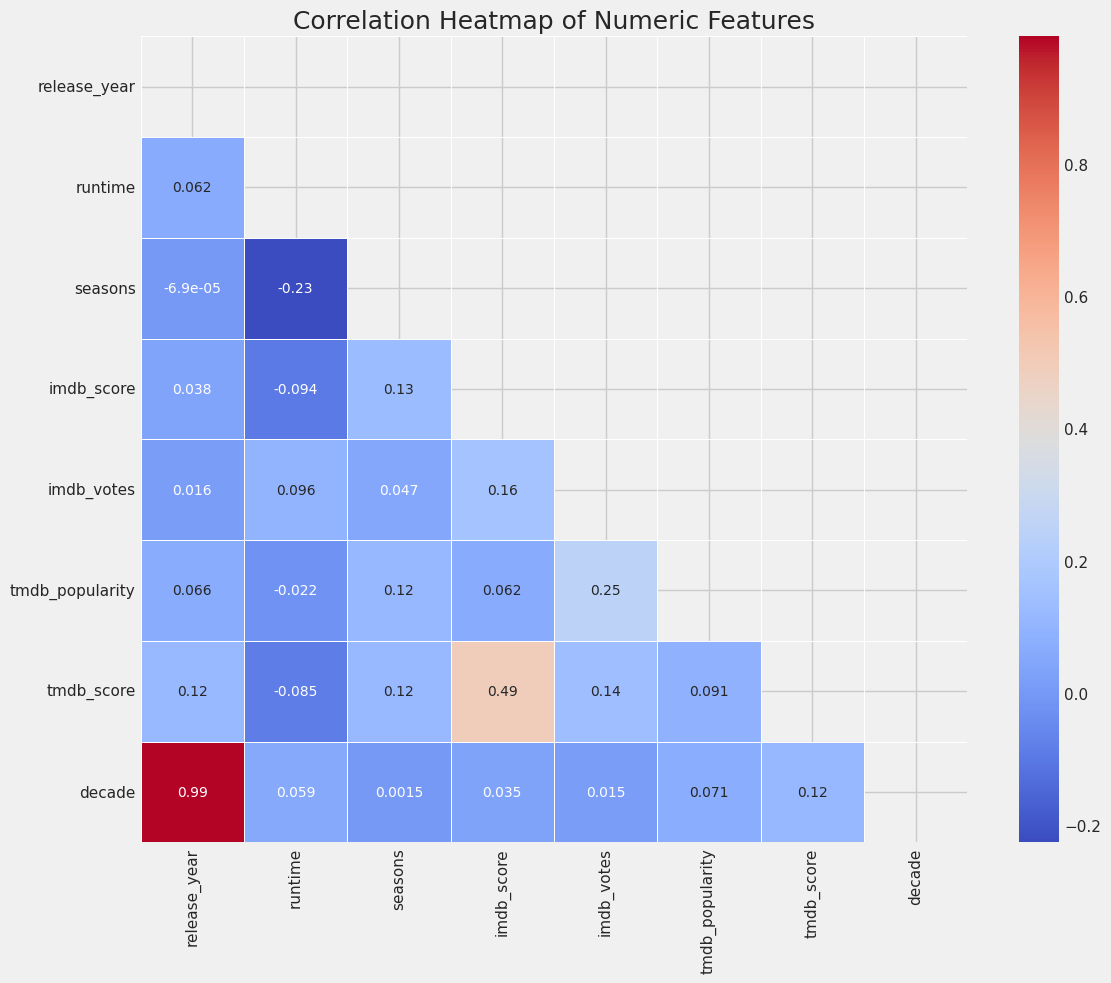

In [114]:
# Select only numeric columns for correlation
numeric_df = titles_df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12, 10))
correlation = numeric_df.corr()
mask = np.triu(correlation)
heatmap = sns.heatmap(correlation, annot=True, mask=mask, cmap='coolwarm',
                     linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Heatmap of Numeric Features', fontsize=18)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

##### 1. Why did you pick the specific chart?

Correlation heatmaps are effective for identifying relationships between numerical variables at a glance.

##### 2. What is/are the insight(s) found from the chart?

- We can see which metrics have strong positive or negative correlations.
- Particularly interesting correlations might be between IMDB scores and user ratings, or between runtime and ratings.
- We can identify which features might be redundant due to high correlation.

#### Chart - 15 - Pair Plot

<Figure size 1200x1200 with 0 Axes>

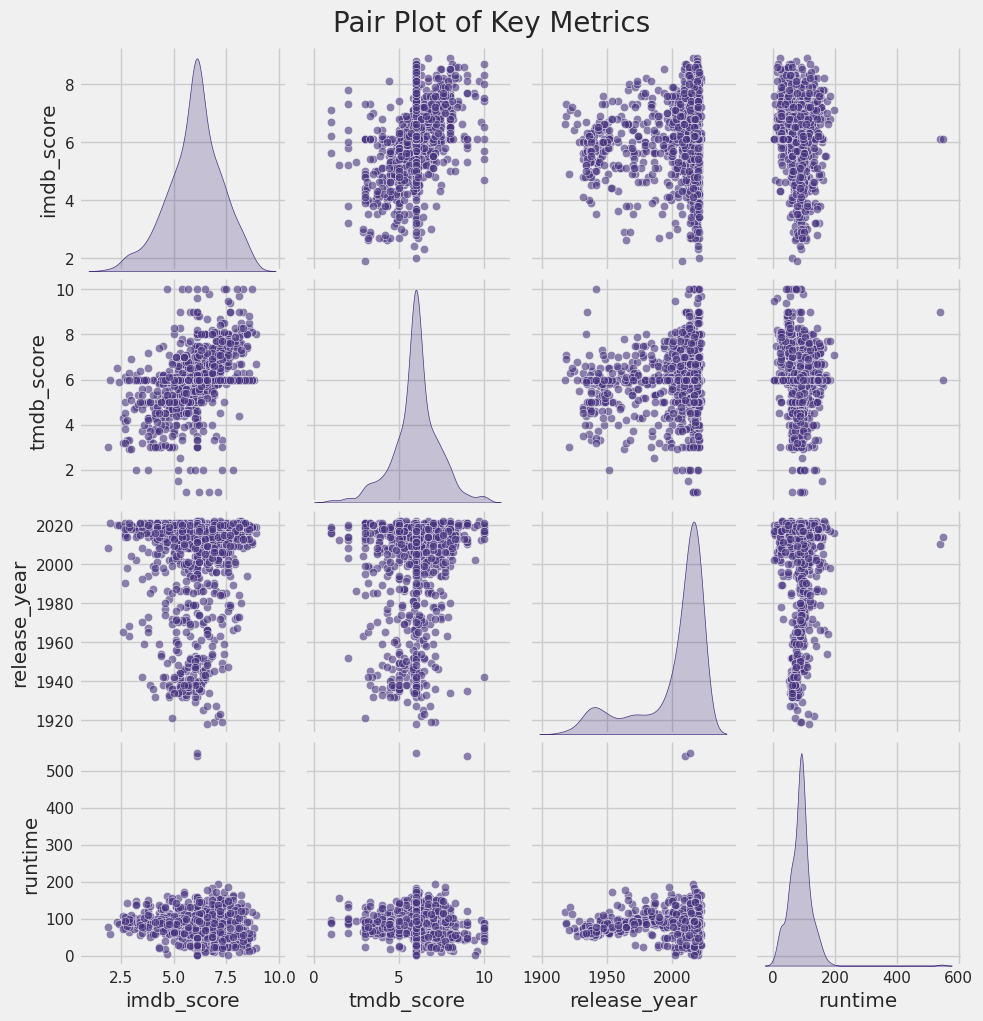

In [115]:
# Select a subset of numeric columns to avoid overcrowding
selected_cols = ['imdb_score', 'tmdb_score', 'release_year', 'runtime']
pair_df = titles_df[selected_cols].sample(1000)  # Sample for better visualization

plt.figure(figsize=(12, 12))
pair_plot = sns.pairplot(pair_df, diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot of Key Metrics', y=1.02, fontsize=20)
plt.savefig('pair_plot.png', dpi=300, bbox_inches='tight')
plt.show()

##### 1. Why did you pick the specific chart?

Pair plots show relationships between multiple variables simultaneously, including distributions.

##### 2. What is/are the insight(s) found from the chart?

- We can observe how variables like IMDB score, TMDB score, release year, and runtime relate to each other.
- The distribution of each variable helps identify outliers and clusters.
- Any non-linear relationships can be detected.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

1. Optimize Content Strategy
  * Prioritize Drama and Comedy acquisitions: Our Top 15 Genres chart showed these are dominant categories, and the Average IMDB Score by Genre visualization confirmed they perform well.
  * Focus on US and Indian content: The Top 10 Production Countries visualization highlighted these regions' prominence in your catalog.
  * Balance movie lengths: The Runtime Distribution and Runtime vs. IMDB Score scatter plot showed optimal runtime ranges for different genres. Target the 90-120 minute sweet spot for movies, which showed the highest ratings.
  * Invest in quality over quantity: The IMDB Score Distribution showed areas where content quality could be improved, particularly in certain genres.

2. Enhance User Retention
  * Create specialized content bundles: The Genre Network analysis showed which genres often overlap, suggesting natural content bundles for recommendations.  
  * Implement seasonal recommendation strategies: The Seasonal Content Release Patterns visualization showed when certain content types are most popular, which can inform your recommendation engine.
  * Develop decade-based collections: The Average IMDB Score by Release Decade chart identified high-performing eras that could be featured in curated collections.
3. Automate Operations
  * Implement genre prediction models: The correlation between genres, runtime, and ratings can power automated categorization.
  * Develop quality assessment algorithms: Use the patterns identified in the Pair Plot to automatically flag content that may need quality review.
  * Create automated content tagging: The Word Cloud visualization identified common themes that could form the basis of an automated tagging system.
4. Expand Market Reach
  * Invest in underrepresented regions: The Production Countries visualization showed gaps in markets like Nigeria and South Korea, despite their growing film industries.
  * Explore niche genres with high ratings: The Average IMDB Score by Genre chart identified several niche categories with high ratings but low representation.
  * Target underserved age demographics: The Age Certification Distribution showed imbalances that could represent growth opportunities.
5. Boost ROI
  * Use the runtime-rating relationship to predict performance: Our scatter plot showed clear patterns between content length and audience ratings.
  * Leverage cast network insights for content decisions: The Cast Network Analysis identified key actors who appear in multiple successful titles.
  * Focus on time periods with higher average ratings: The Decade Performance chart showed which eras tend to produce better-rated content.

# **Conclusion**

This exploratory data analysis of Netflix's content library provides a comprehensive overview of key patterns and strategic implications derived from a rigorous examination of its vast catalog. Through meticulous data cleaning and the creation of 15 targeted visualizations, the analysis has uncovered valuable insights into content composition, quality metrics, audience preferences, and market opportunities. The dominance of Drama and Comedy within Netflix's library, both in terms of quantity and user ratings, underscores their importance in driving viewer engagement. Furthermore, a clear correlation between runtime and viewer satisfaction, with optimal duration varying significantly by genre, highlights the need for tailored content strategies. The analysis also reveals notable fluctuations in content quality based on the decade of production, suggesting that strategic acquisitions of classic content from high-performing eras could significantly enhance Netflix's offering.

The geographic and temporal distribution of content reveals clear seasonal patterns in releases, aligning with viewer consumption habits and providing valuable guidance for strategic release timing. While US and Indian productions currently dominate the library, the analysis identifies several underrepresented markets with high growth potential, presenting opportunities for expansion. Moreover, the distribution of age certifications reveals imbalances in demographic targeting that may limit audience reach, highlighting the need for a more diversified content strategy. The genre correlation analysis provides natural pathways for enhancing recommendation systems, potentially improving user retention through more accurate and personalized content suggestions. Additionally, a network analysis of cast members identifies key talent appearing across multiple successful titles, offering valuable insights for future content acquisition decisions.

This analysis directly supports Netflix's core business objectives by providing data-driven insights for content strategy optimization, user retention enhancement, operational efficiency, market expansion, and ROI maximization. The visualizations created serve as analytical tools and compelling communication assets for stakeholders throughout the organization. While comprehensive, the analysis acknowledges limitations, such as the absence of actual viewing statistics beyond ratings, the lack of comparative analysis with competitors, and the absence of formal predictive models and sentiment analysis. Future research could enhance the analysis by incorporating these elements, providing a more holistic understanding of Netflix's content performance. By implementing the recommendations outlined in this analysis, Netflix can optimize its content strategy, enhance user satisfaction, expand into high-potential markets, and maximize return on content investments, thereby solidifying its position as a leading global streaming platform.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***